<a href="https://colab.research.google.com/github/battles5/data_visualization_FAV_2020/blob/master/Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Seaborn Library

Dataset-Oriented Library

* [Seaborn Offical Page](https://seaborn.pydata.org/)
* [Seaborn Gallery Esempi](https://seaborn.pydata.org/examples/index.html)
* [Searborn Tutorial Get Started](https://seaborn.pydata.org/tutorial.html)
* [Api reference](https://seaborn.pydata.org/api.html)

Importante:
> Searbon è una  libreria di data-visualization basata su [**Matplotlib**](https://matplotlib.org/) e si integra in modo semplice con [Pandas](https://pandas.pydata.org/docs/getting_started/index.html).

In questo notebook utilizzermo:

* Pandas come database (dataframe)
* Seaborn per visualizzare i dati

Informazioni utili:
* [Matplotlib rcParams](https://matplotlib.org/tutorials/introductory/customizing.html)
* [Seaborn Theme and Style options](https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial)
* [Come organizzare il dataframe per essere compatibili con seaborn?](https://seaborn.pydata.org/introduction.html#intro-tidy-data)
* [Tutorial sui colori dei grafici](https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial)
* [Tranform a Pandas not tidy dataframe into a tidy one](https://tomaugspurger.github.io/modern-5-tidy.html)
* [Seaborn FaceGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import  numpy as np
%matplotlib inline
# Behind the scene seaborn use matplotlib to draw the plot
# Apply default default seaborn theme, scaling, and color palette.
sns.set() 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 0) Dataset Organization



In [0]:
# Load dataset
tips = sns.load_dataset("tips") # same as  pandas.read_csv()
display(tips.head())

# long form or tidy formatting dataset
# Ogni variabile è una colonna. A una variabile assegno un ruolo nel plot
# Ogni osservazione (observation) è una riga
# Usa pandas.melt() funtion for un-pivoting a wide-form dataframe

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1) Searborn scatter plot (replot)
* [Seaborn replot documentation](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


'\nMostra la relazione tra 5 diverse variabili\n3 numeriche : total_bil, tip,size\n2 categoriche: time, smoker\nLa variable categorica smoker divide il dataset in due assi.\nDelle colonne x=total_bil e y=tip voglio\ncol="time" (col deve essere una variabile categorica) -> divide il grafico in n categorie\nstyle="smoker" per ogni grafico (col="time) voglio che i dati (x-y) siano rappresentati con \nsimboli-stili diversi se sono smorker=Yes o No\nhue="smoker" è uguale a style solo che qua cambiano i colori non i simboli\nsize= dimensione del marker\n'

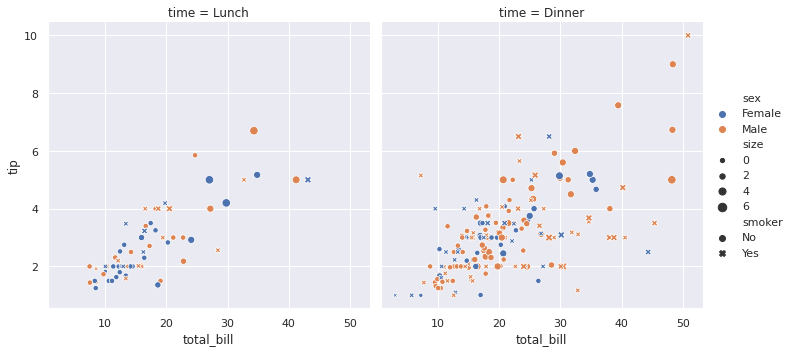

In [0]:
# Load dataset
tips = sns.load_dataset("tips") # same as  pandas.read_csv()
display(tips.head())

# Plot
sns.relplot(x="total_bill", y="tip", col="time",
            hue="sex", style="smoker", size="size",
            data=tips);

# Commento:
'''
Mostra la relazione tra 5 diverse variabili
3 numeriche : total_bil, tip,size
2 categoriche: time, smoker
La variable categorica smoker divide il dataset in due assi.
Delle colonne x=total_bil e y=tip voglio
col="time" (col deve essere una variabile categorica) -> divide il grafico in n categorie
style="smoker" per ogni grafico (col="time) voglio che i dati (x-y) siano rappresentati con 
simboli-stili diversi se sono smorker=Yes o No
hue="smoker" è uguale a style solo che qua cambiano i colori non i simboli
size= dimensione del marker
'''


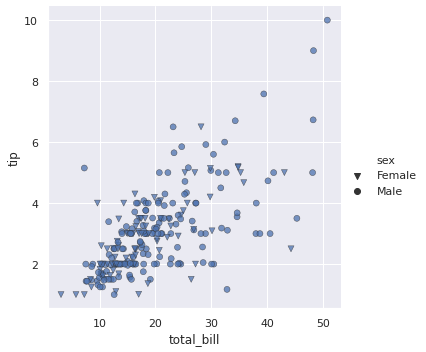

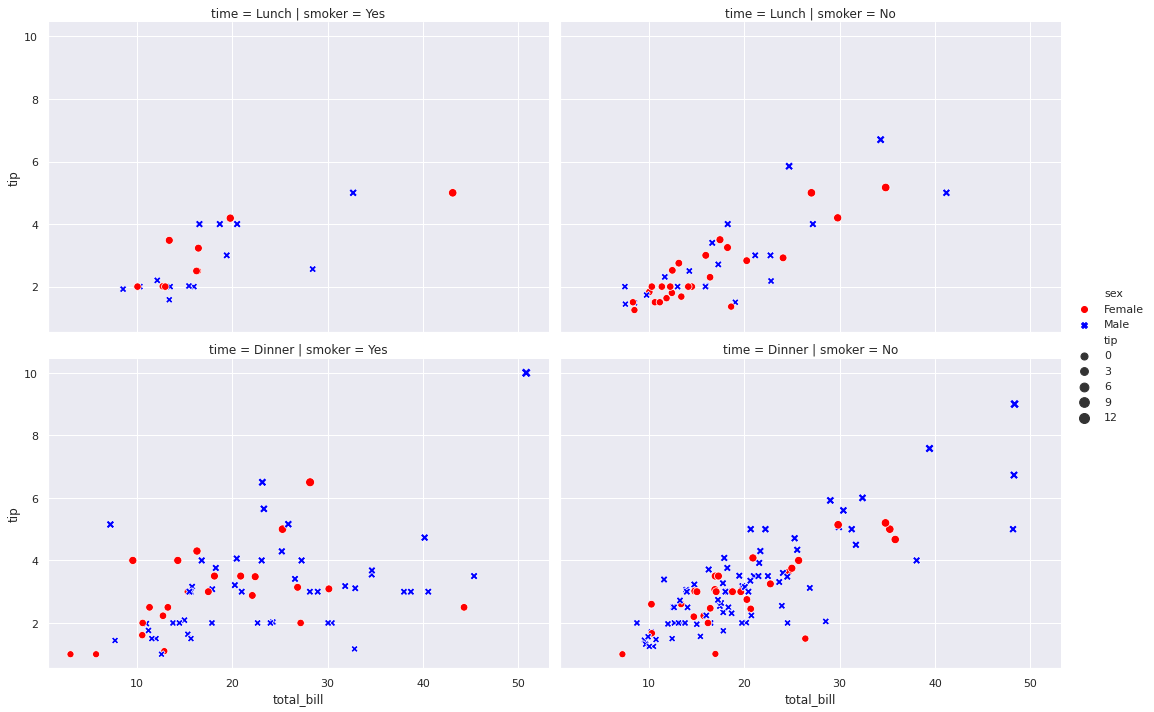

In [0]:
# Dividi in N colonne (dipende dalle categorie della colonna time)
#sns.relplot(x="total_bill", y="tip", col="time", data=tips)

# Dividi N righe (dipende dalle categorie della colonna sex)
#sns.relplot(x="total_bill", y="tip", row="sex", data=tips)

# Conto totale vs mancie distinguendo maschio/femmina (basandoci sul colore)
#sns.relplot(x="total_bill", y="tip", hue="sex", data=tips)

# Conto totale vs mancie distinguendo maschio/femmina (basandoci sui simboli)
#sns.relplot(x="total_bill", y="tip", style="sex", palette="YlGnBu", data=tips)
sns.relplot(x="total_bill", y="tip", style="sex", palette="YlGnBu", markers=["v", "o"],  edgecolor=".2", linewidth=.5, alpha=.75, data=tips)
# Importante:
# There is a direct correspondence with an underlying matplotlib function (like scatterplot() 
# and matplotlib.axes.Axes.scatter()), additional keyword arguments will be passed through to 
#the matplotlib layer
# markers type: https://matplotlib.org/3.2.1/api/markers_api.html
# Puoi usare qualueque di questi: https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter

# Conto totale vs mancie distinguendo maschio/femmina (basandoci sui simboli)) , 
# e distinguendo fumatore non fumatore (basandoci sui colori) --> tutto nello stesso grafico,
#sns.relplot(x="total_bill", y="tip", style="sex", hue="smoker", data=tips)

# Conto totale vs mancie distinguendo maschio/femmina (basandoci sui simboli)) , 
# e distinguendo fumatore non fumatore (basandoci sui colori) e facciamo il puntino/marker
# piu grande in base alla mancia ricevuta --> tutto nello stesso grafico,
# sizes = (min, max)
# legend = "brief", "full"
# kind = "scatter", "line"
#sns.relplot(x="total_bill", y="tip", kind="scatter", style="sex", hue="smoker", size="tip",sizes=(5,100), data=tips)

# Conto totale vs mancie distinguendo maschio/femmina (basandoci sui simboli)) , 
# e distinguendo fumatore non fumatore in due grafici diversi
# col_wrap, row_wrap = se per esempio avessimo time="colazione,pranzo,cena,spuntino",
# avrei potuto scriverec col="time" e col_wrap=2 e mi avrebbe craeato un grafico 2x2 invece che 1x4
# palette=["red", "blue"],style="sex" (distingue) maschio e femmina per tipo di marker 
# pallette = "YlGnBu"
# hue="sex" (distingue maschio e femmina per colore, il colore è dato dal palette),
sns.relplot(x="total_bill", y="tip", col="smoker", row="time",height=5,aspect=1.5 , palette=["red", "blue"],style="sex", hue="sex", size="tip", sizes=(50,100),data=tips)



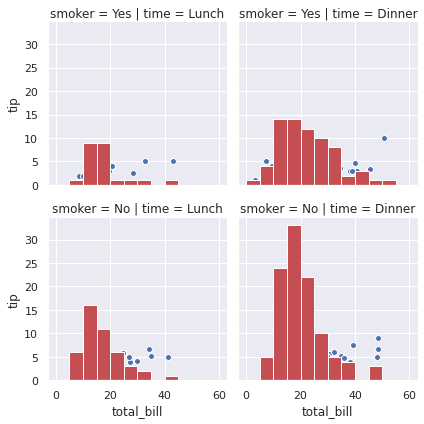

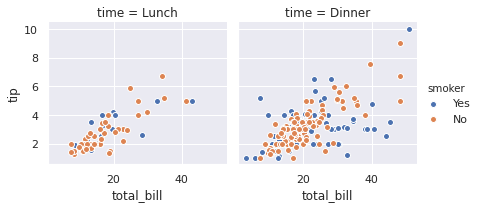

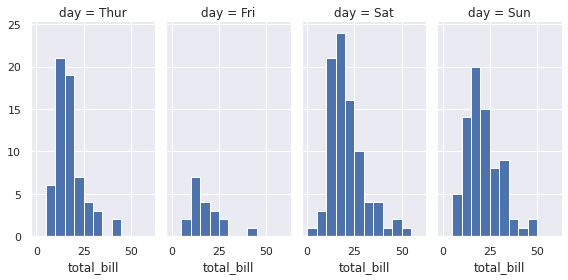

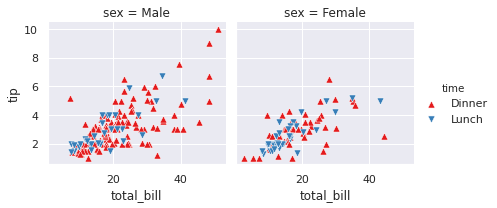

In [0]:
## FaceGrid example
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
#sns.set(style="ticks", color_codes=True)
tips = sns.load_dataset("tips")
bins=np.arange(0, 65, 5)
g = sns.FacetGrid(tips, col="time", row="smoker")
g = g.map(plt.hist, "total_bill",  bins=bins, color="r")
g = g.map(plt.scatter, "total_bill", "tip", edgecolor="w")

g = sns.FacetGrid(tips, col="time", hue="smoker")
g = (g.map(plt.scatter, "total_bill", "tip", edgecolor="w").add_legend())

g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g = g.map(plt.hist, "total_bill", bins=bins)

#palette=pal
kws = dict(s=50, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(tips, col="sex", hue="time", palette="Set1",
                  hue_order=["Dinner", "Lunch"],hue_kws=dict(marker=["^", "v"]))
g = (g.map(plt.scatter, "total_bill", "tip", **kws)
     .add_legend())

### 2) Seaborn line plot (replot)

,align,choice,time,coherence,firing_rate
838,sacc,T2,280,6.4,27.583979
839,sacc,T2,280,12.8,28.511530
840,sacc,T2,280,25.6,26.470588
841,sacc,T2,280,51.2,30.813953
842,sacc,T2,300,0.0,28.384913
843,sacc,T2,300,3.2,33.281734
844,sacc,T2,300,6.4,27.583979
845,sacc,T2,300,12.8,28.511530
846,sacc,T2,300,25.6,27.009804
847,sacc,T2,300,51.2,30.959302


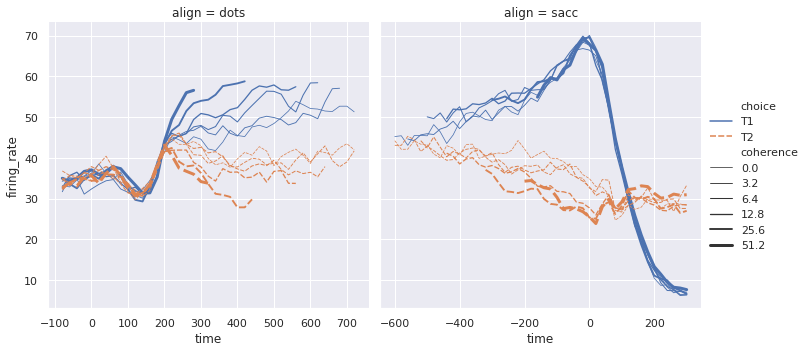

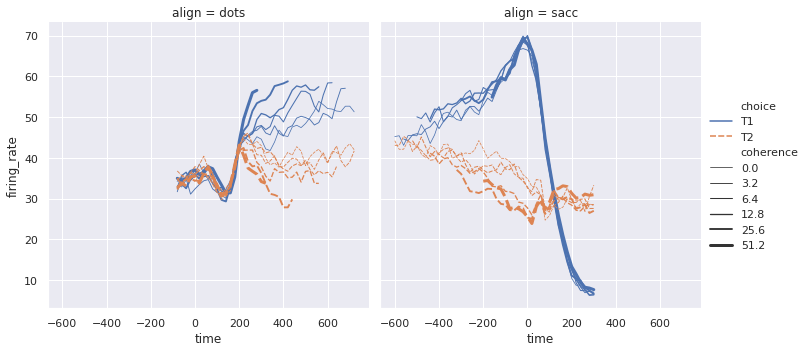

In [0]:
dots = sns.load_dataset("dots")
display(dots.tail(10))
sns.relplot(x="time", y="firing_rate", col="align",
            hue="choice", size="coherence", style="choice",
            facet_kws=dict(sharex=False),
            kind="line", legend="full", data=dots);

sns.relplot(x="time", y="firing_rate", col="align",
            hue="choice", size="coherence", style="choice",
            facet_kws=dict(sharex=True),
            kind="line", legend="full", data=dots);
# hue="choice" (line con colori diversi)
# style="choice" linee con stili diversi (diritta vs tratteggiata)
# size="coherence" dimensione della linea
# facet_kws=dict(sharex=False) mette a fuoco il contenuto del grafico
       

### 3) Seaborn Statistical Estimation and error bars (replot)


,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


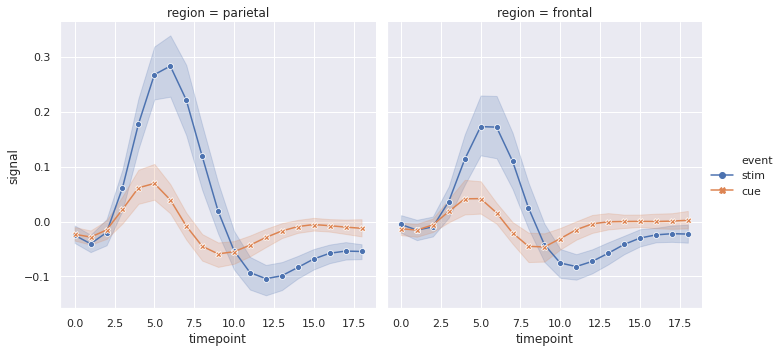

In [0]:
# Average Line statistical estimation
fmri = sns.load_dataset("fmri")
display(fmri.head())
sns.relplot(x="timepoint", y="signal", col="region",
            hue="event", style="event",
            kind="line", dashes=False, markers=True, data=fmri);

### 4) Seaborn Statistical Model estimation (lmsplot)

* [Seaborn lmsplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


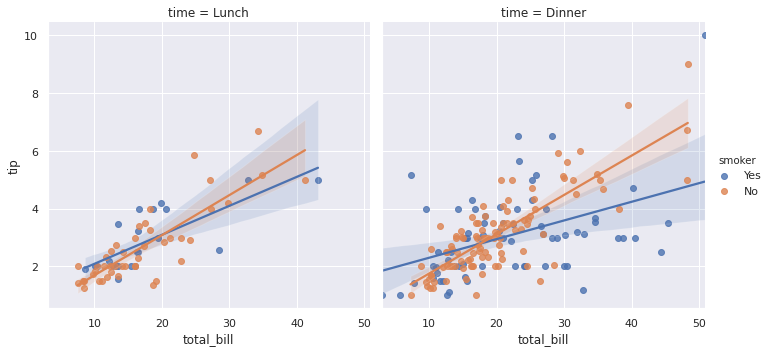

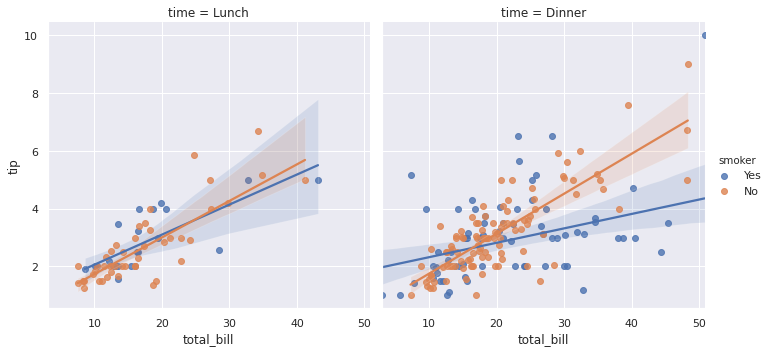

In [0]:
# logistic = True # logistic regression model
# robust = True   # Robust regression model
# fit_reg = True  # linear regression
# scatter = True  # plot also the points down
tips = sns.load_dataset("tips") # same as  pandas.read_csv()
display(tips.head())
sns.lmplot(x="total_bill", y="tip", col="time", hue="smoker",  fit_reg=True, data=tips);
sns.lmplot(x="total_bill", y="tip", col="time", hue="smoker", robust=True,data=tips);



### 5) Seaborn Categorical Plot (catplot)
* [Seaborn catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


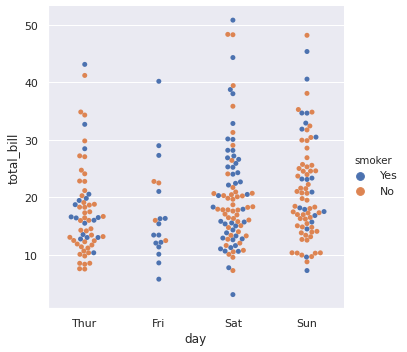

In [0]:
tips = sns.load_dataset("tips") # same as  pandas.read_csv()
display(tips.head())
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="swarm", data=tips);

# kind swarm perchè si vuole raffigurare tutti i total_bill (conti) del giovedi
# by drawing a scatter plot that adjusts the positions of the points along the categorical axis so that they don’t overlap
# Domanda: perchè ci sono più punti a total_bill=10 day=Thur. Perchè ci sono stati molti conti a total_bil=10


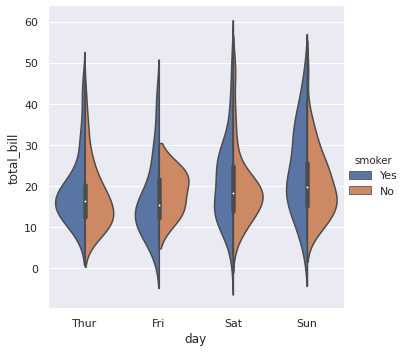

In [0]:
# Se la granularity non ci convince nell'esprimere la quantità di conti a un certo valore
# possiamo usare il violin plot (kernel density estimation)
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="violin", split=True,inner="box", data=tips);
# slipt = True, False
# inner = box, quartile, point stick None
# box plots show data points outside 1.5 * the inter-quartile range as outliers above or below the whiskers whereas violin plots show the whole range of the data.
# box plot risponde in modo rapido a quali sono per giorni i total_bill più comuni

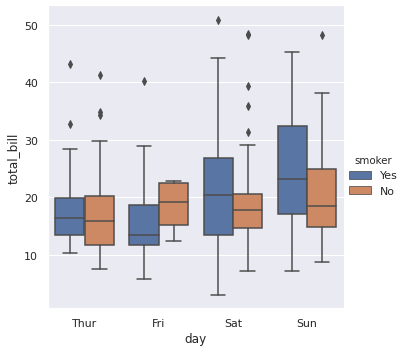

In [0]:
# Mostriamo solo il valore medio e l 'intervallo (Box plot per vedere gli intervalli medi)
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="box", data=tips);
# kind=bar

### 6) Seaborn with Matplotlib

* [MatplotLib Scatter Plot paramters]( https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter
)

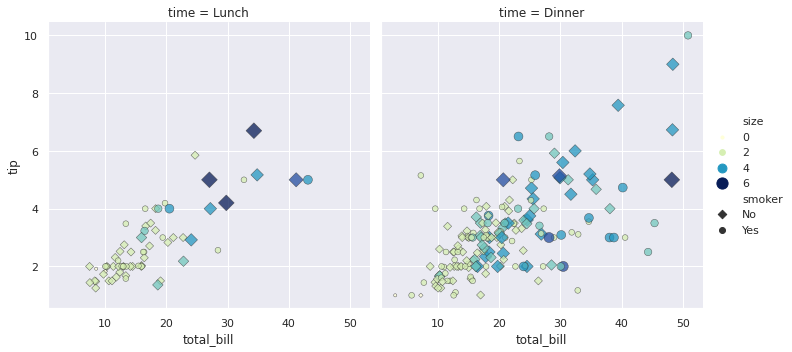

In [0]:
sns.relplot(x="total_bill", y="tip", col="time",
            hue="size", style="smoker", size="size",
            palette="YlGnBu", markers=["D", "o"], sizes=(10, 125),
            edgecolor=".2", linewidth=.5, alpha=.75,
            data=tips);
# palette="muted"

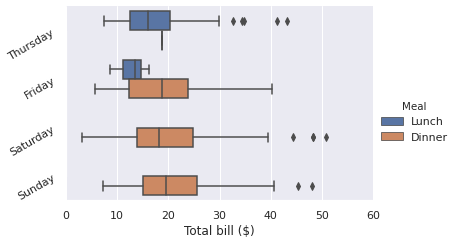

In [0]:
g = sns.catplot(x="total_bill", y="day", hue="time",
                height=3.5, aspect=1.5,
                kind="box", legend=False, data=tips);
g.add_legend(title="Meal")
g.set_axis_labels("Total bill ($)", "")
g.set(xlim=(0, 60), yticklabels=["Thursday", "Friday", "Saturday", "Sunday"])
g.despine(trim=True)
g.fig.set_size_inches(6.5, 3.5)
g.ax.set_xticks([5, 15, 25, 35, 45, 55], minor=True);
plt.setp(g.ax.get_yticklabels(), rotation=30);

### 7) Data struncture
[Seaborn jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

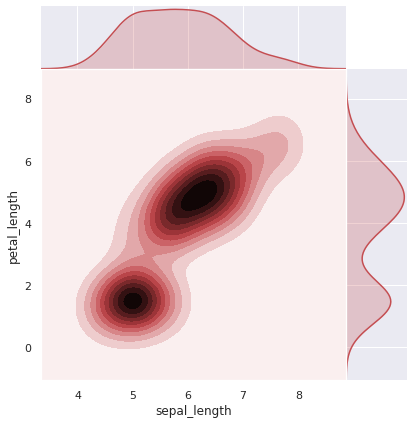

In [0]:
iris = sns.load_dataset("iris")
# kind="reg" (regression)
# kind="hex" #hexagonal bins
# kind="kde" # Replace the scatterplots and histograms with density estimates and align the marginal Axes tightly with the joint Axes:
sns.jointplot(x="sepal_length", y="petal_length", data=iris, kind="kde",space=0, color="r"); # on histogram mostra kernel density

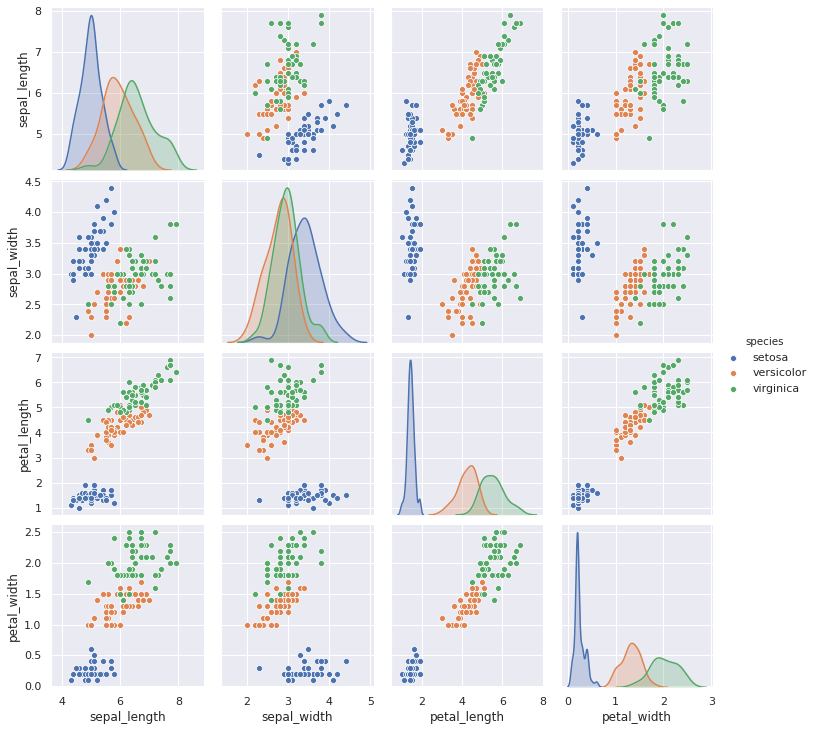

In [0]:
# Confusion matrix
sns.pairplot(data=iris, hue="species");
# palette="husl"